# Extracting a Logistic Regression parameter

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
credit_csv = pd.read_csv('datasets/credit-card-full.csv')
credit_csv.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Features and labels
X = credit_csv.drop(['ID','default payment next month'],axis=1)
y = credit_csv['default payment next month']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=21)

In [4]:
from sklearn.linear_model import LogisticRegression

# Create LogisticRegression model
log_reg = LogisticRegression()

# Train data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [5]:
# Evaluate
log_reg.score(X_test,y_test)

0.7773333333333333

In [7]:
# Create a list of original variable names from the training DataFrame
original_variables = list(X_train.columns)

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

print()

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:3]
print(top_three_df)

     Variable   Coefficient
0   LIMIT_BAL -5.292381e-06
1         SEX -2.870114e-05
2   EDUCATION -3.550117e-05
3    MARRIAGE -3.096806e-05
4         AGE -5.029082e-04
5       PAY_0  3.668241e-05
6       PAY_2  2.905251e-05
7       PAY_3  2.536665e-05
8       PAY_4  2.400620e-05
9       PAY_5  2.207957e-05
10      PAY_6  2.034732e-05
11  BILL_AMT1 -1.221593e-05
12  BILL_AMT2  7.032387e-06
13  BILL_AMT3  3.455032e-06
14  BILL_AMT4 -6.780924e-07
15  BILL_AMT5  6.926626e-06
16  BILL_AMT6 -3.447805e-07
17   PAY_AMT1 -3.892239e-05
18   PAY_AMT2 -2.254219e-05
19   PAY_AMT3 -5.690791e-06
20   PAY_AMT4 -2.397210e-05
21   PAY_AMT5 -7.030300e-06
22   PAY_AMT6 -1.391720e-06

  Variable  Coefficient
5    PAY_0     0.000037
6    PAY_2     0.000029
7    PAY_3     0.000025


**Note:** The coefficients of the model allow you to see which variables are having a larger or smaller impact on the outcome. Additionally the sign lets you know if it is a positive or negative relationship.

# Building Learning Curves

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

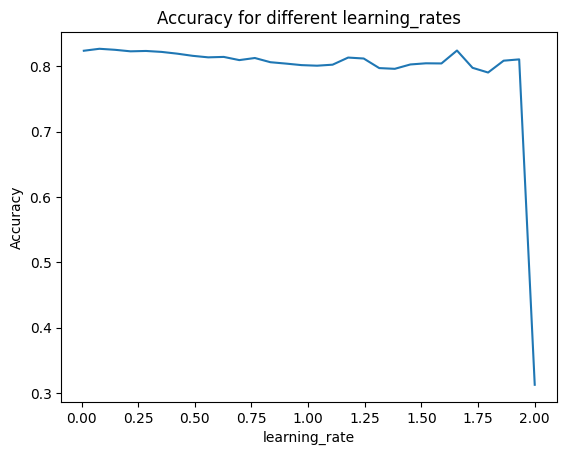

In [14]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()